In [1]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

# 鸟类映射（按你的映射字典填充）
bird_name_mapping = {
    "Background Noise": 0,
    "Black-headed Gull": 1,
    "Canada Goose": 2,
    "Carrion Crow": 3,
    "Common Chaffinch": 4,
    "Common Kingfisher": 5,
    "Common Redstart": 6,
    "Dunnock": 7,
    "Eurasian Blackbird": 8,
    "Eurasian Blackcap": 9,
    "Eurasian Blue tit": 10,
    "Eurasian Bullfinch": 11,
    "Eurasian Coot": 12,
    "Eurasian Golden Oriole": 13,
    "Eurasian Jay": 14,
    "Eurasian Nuthatch": 15,
    "Eurasian Siskin": 16,
    "Eurasian Treecreeper": 17,
    "Eurasian Wren": 18,
    "European Goldfinch": 19,
    "European Robin": 20,
    "Goldcrest": 21,
    "Great Spotted Woodpecker": 22,
    "Great Tit": 23,
    "Hawfinch": 24,
    "Hooded Crow": 25,
    "Long-tailed Tit": 26,
    "Mallard": 27,
    "Marsh Tit": 28,
    "Redwing": 29,
    "Rook": 30,
    "Short-toed Treecreeper": 31,
    "Stock Dove": 32,
}

# 定义 Dataset 类（LSTM 适配版）
class BirdSoundLSTMDataset(Dataset):
    def __init__(self, csv_path, bird_name_mapping):
        self.df = pd.read_csv(csv_path)
        self.bird_name_mapping = bird_name_mapping

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        file_path = row["mel_path"]
        label = self.bird_name_mapping[row["bird_name"]]

        # 加载 mel 频谱图（原始 shape: [256, 512]）
        mel = np.load(file_path).astype(np.float32)

        # 转置为 [time, freq] = [512, 256]
        mel = mel.T

        # 归一化处理
        mel = (mel - mel.min()) / (mel.max() - mel.min() + 1e-6)

        return torch.tensor(mel), label

# 实例化 Dataset（替换成你的 train_csv 路径）
csv_path = "E:/AMR/DA/Projekt/data/data_list/0408/train_list_high_quality.csv"
dataset = BirdSoundLSTMDataset(csv_path, bird_name_mapping)

# 查看第一个样本
x, y = dataset[0]
print(f"✅ 输入 shape: {x.shape}")   # 期望: [512, 256]
print(f"🎯 标签 label: {y}")


✅ 输入 shape: torch.Size([512, 256])
🎯 标签 label: 1


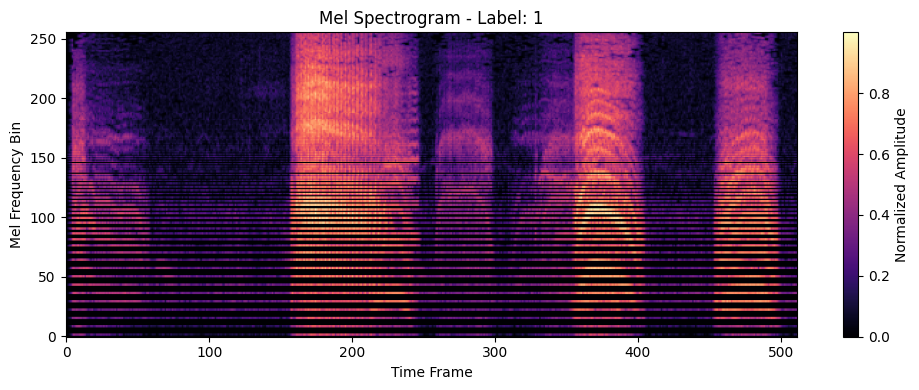

In [2]:
import matplotlib.pyplot as plt

# 随便取一个样本
mel_tensor, label = dataset[0]
mel_np = mel_tensor.numpy().T  # 转置回来变成 (freq, time) 便于可视化

plt.figure(figsize=(10, 4))
plt.imshow(mel_np, origin="lower", aspect="auto", cmap="magma")
plt.colorbar(label="Normalized Amplitude")
plt.title(f"Mel Spectrogram - Label: {label}")
plt.xlabel("Time Frame")
plt.ylabel("Mel Frequency Bin")
plt.tight_layout()
plt.show()
